<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/br_johnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 2>/dev/null

In [ ]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
import heapq as hq
import math

In [ ]:
def relax(G, u, v):
  g_u = G.nodes[u]["cost"]
  g_v = G.nodes[v]["cost"]
  w_uv = G.edges[u, v]["weight"]
  if g_u + w_uv < g_v:
    G.nodes[v]["cost"] = g_u + w_uv
    G.nodes[v]["path"] = u
    return True
  return False

In [ ]:
def bellmanFord(G, s):
  n = G.number_of_nodes()
  for u in G.nodes:
    G.nodes[u]["cost"] = math.inf
    G.nodes[u]["path"] = -1

  G.nodes[s]["cost"] = 0

  for _ in range(n - 1):
    for u, v in G.edges:
      relax(G, u, v)

  for u, v in G.edges:
    if relax(G, u, v):
      return False
  return True

In [ ]:
def dijkstra(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path']    = -1
    G.nodes[u]['cost']    = math.inf

  G.nodes[s]['cost'] = 0
  q = [(0, s)]
  while q:
    g_u, u = hq.heappop(q)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          if relax(G, u, v):
            hq.heappush(q, (G.nodes[v]["cost"], v))

  path = [0]*G.number_of_nodes()
  for v, info in G.nodes.data():
    path[v] = info['path']

  return path

In [ ]:
def johnsson(G):
  n = G.number_of_nodes()
  G2 = G.copy()

  G2.add_node(n)
  G2.add_edge(n, n-1, weight=0)

  if not bellmanFord(G2, n): # Ciclo negativo
    return None

  G3 = G.copy()
  for u, v in G3.edges:
    C_uv = G.edges[u, v]["weight"]
    P_u = G2.nodes[u]["cost"]
    P_v = G2.nodes[v]["cost"]
    G3.edges[u, v]["weight"] = C_uv + P_u - P_v

  path = []
  for u in range(n):
    path.append(dijkstra(G3, u))

  return path

In [ ]:
%%file 1.wel
0 3 2
1 0 6
1 2 3
2 0 4
2 3 5
3 1 -7
3 2 -3

Writing 1.wel


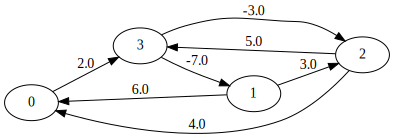

In [ ]:
G = nx.read_weighted_edgelist("1.wel", create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G, weighted=True)

In [ ]:
johnsson(G)

[[-1, 3, 1, 0], [1, -1, 1, 0], [2, 3, -1, 2], [1, 3, 1, -1]]